In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/dataset6.csv")

In [74]:
df

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,1
44896,How to Blow $700 Million: Al Jazeera America F...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


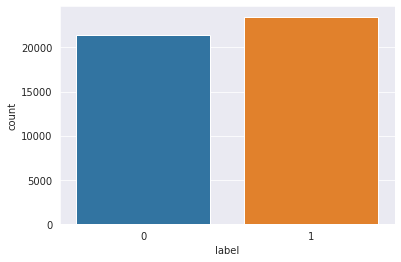

In [75]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [76]:
X = df['text'].to_list()
y = df['label'].to_list()

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [77]:
import re

In [78]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [79]:
X_url = [remove_url(x) for x in X]

LOWERCASING

In [80]:
X_lower = [x.lower() for x in X_url]

In [81]:
X_lower[:5]

['as u.s. budget fight looms, republicans flip their fiscal script washington (reuters) - the head of a conservative republican faction in the u.s. congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on sunday and urged budget restraint in 2018. in keeping with a sharp pivot under way among republicans, u.s. representative mark meadows, speaking on cbs’ “face the nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in january. when they return from the holidays on wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the november congressional election campaigns approach in which republicans will seek to keep control of congress. president donald trump and his republicans want a big budget increase in military spending, while democrats also want proportional increases for no

REMOVING ALL NON-ALPHABETS

In [82]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [83]:
X_re = [cleandata(x) for x in X_lower]

In [84]:
len(X_re[0])

4536

STOPWORD REMOVAL

In [85]:
import nltk
from nltk.corpus import stopwords

In [86]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
stop = set(stopwords.words('english'))

In [88]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [89]:
X_stop = [remove_stopwords(x) for x in X_re]

In [90]:
len(X_stop[0])

3393

In [91]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [92]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/dataset6_preprocessed.csv', index=False)

In [93]:
url_saved = '/content/drive/MyDrive/MSc Project/Data/dataset6_preprocessed.csv'
df_save = pd.read_csv(url_saved)
df_save

,text,label
0,us budget fight looms republicans flip fiscal ...,0
1,us military accept transgender recruits monday...,0
2,senior us republican senator 'let mr mueller j...,0
3,fbi russia probe helped australian diplomat ti...,0
4,trump wants postal service charge 'much more' ...,0
...,...,...
44893,mcpain john mccain furious iran treated us sai...,1
44894,justice yahoo settles email privacy classactio...,1
44895,sunnistan us allied safe zone plan take territ...,1
44896,blow million al jazeera america finally calls ...,1
